In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.1.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [4]:
data = pd.read_csv('sp500.csv')

In [5]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,1258.859985,1284.619995,1258.859985,1277.060059,1277.060059,3943710000
1,2012-01-04,1277.030029,1278.729980,1268.099976,1277.300049,1277.300049,3592580000
2,2012-01-05,1277.300049,1283.050049,1265.260010,1281.060059,1281.060059,4315950000
3,2012-01-06,1280.930054,1281.839966,1273.339966,1277.810059,1277.810059,3656830000
4,2012-01-09,1277.829956,1281.989990,1274.550049,1280.699951,1280.699951,3371600000


In [6]:
data = pd.read_csv('sp500.csv')
dataframe = pd.DataFrame({'close': data['Close'], 'timestamp': data['Date']})
close_mvng_avg = dataframe['close'][::-1].rolling(window = 10).mean()
dataframe.head()

,close,timestamp
0,1277.060059,2012-01-03
1,1277.300049,2012-01-04
2,1281.060059,2012-01-05
3,1277.810059,2012-01-06
4,1280.699951,2012-01-09


In [7]:
close_mvng_avg = close_mvng_avg[::-1]

In [8]:
for i in range(len(dataframe['close'])):
    if dataframe['close'][i] == 0 or dataframe['close'][i] < 0:
        dataframe['close'][i] = 0.00001

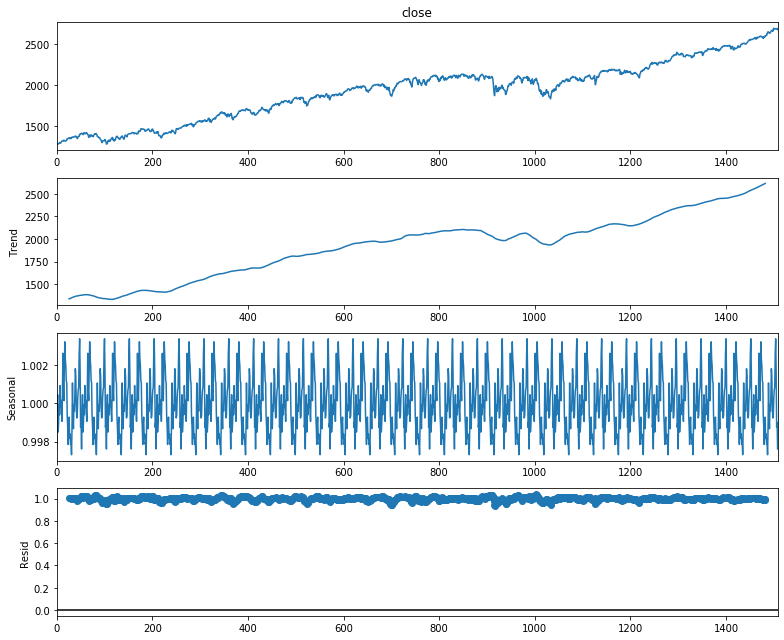

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9
result = seasonal_decompose(dataframe['close'], model='multiplicative', period = 52)
fig = result.plot()

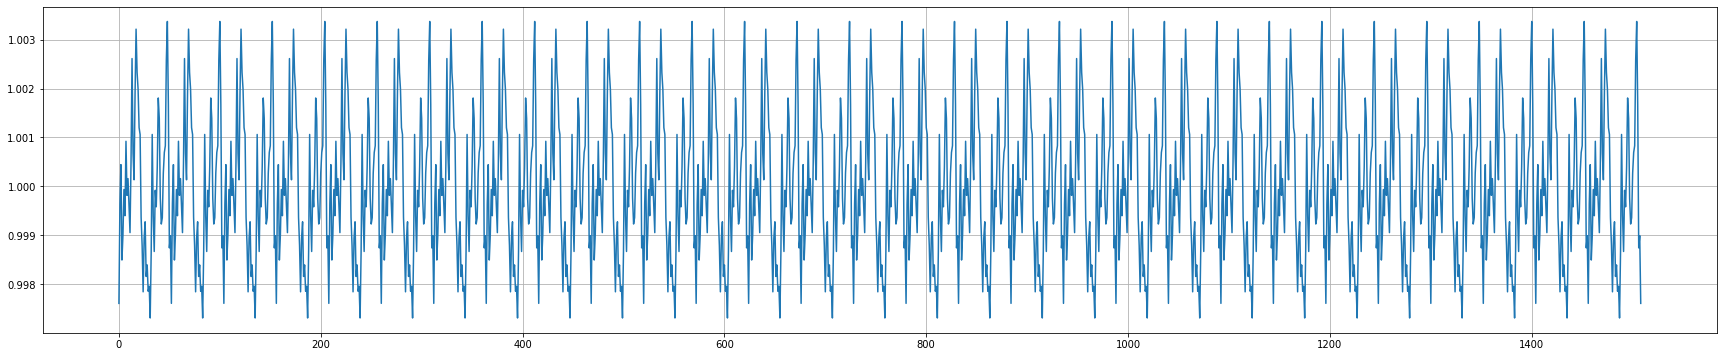

In [12]:
plt.figure(figsize = (30, 6))
plt.plot(result.seasonal)
plt.grid()

In [13]:
seasonal_array = np.array(result.seasonal)

In [15]:
seasonal_df = {'seasonal':seasonal_array, 'timestamp':data['Date']}

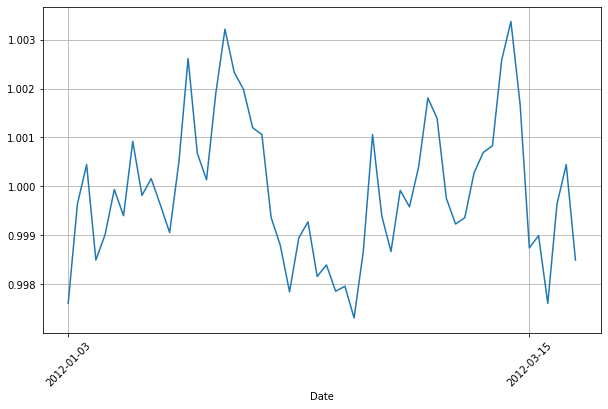

In [16]:
plt.figure(figsize = (10, 6))
sns.lineplot(y = seasonal_df['seasonal'][:56], x = seasonal_df['timestamp'][:56])
plt.xticks(rotation = 45)
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(50))
plt.grid()
plt.show()

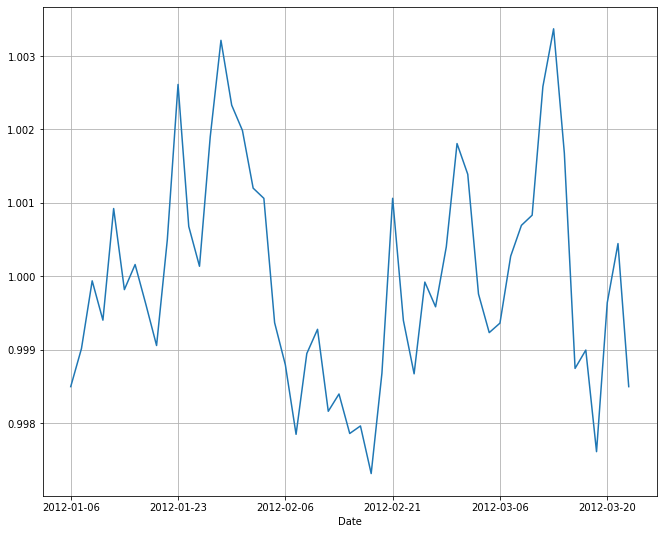

In [17]:
sns.lineplot(x = seasonal_df['timestamp'][3:56], y = seasonal_df['seasonal'][3:56])
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.grid()
plt.show()

In [18]:
seasonal_df['seasonal'][3:56]

array([0.99849415, 0.99901253, 0.99993575, 0.99939997, 1.00092112,
       0.99981613, 1.00015812, 0.99961666, 0.99905441, 1.00049373,
       1.00261196, 1.0006765 , 1.00013429, 1.00189713, 1.00321316,
       1.0023301 , 1.00198551, 1.00119908, 1.00105975, 0.99936593,
       0.99879226, 0.99784428, 0.99894484, 0.99927528, 0.99815815,
       0.99839384, 0.99785569, 0.99795852, 0.99730957, 0.99867568,
       1.00106058, 0.99939646, 0.99866883, 0.99991883, 0.99958199,
       1.00040001, 1.00180628, 1.00138774, 0.99975645, 0.99923021,
       0.99935966, 1.00027199, 1.00069197, 1.00083035, 1.00258197,
       1.00337034, 1.00167686, 0.99874242, 0.99899243, 0.99760812,
       0.99963885, 1.00044357, 0.99849415])

In [19]:
index_array = np.array(range(0, 52))

In [20]:
index_array

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51])

In [21]:
seasonal_dict = zip(index_array, seasonal_df['seasonal'][4:56])
seasonal_dict = dict(seasonal_dict)

In [22]:
seasonal_dict

{0: 0.9990125299741657,
 1: 0.9999357542005317,
 2: 0.9993999701518793,
 3: 1.0009211219556318,
 4: 0.9998161308852952,
 5: 1.0001581168351712,
 6: 0.9996166560282251,
 7: 0.9990544113392453,
 8: 1.0004937324524739,
 9: 1.0026119596829461,
 10: 1.000676495741666,
 11: 1.000134285624813,
 12: 1.0018971317892265,
 13: 1.0032131601312284,
 14: 1.0023300971929825,
 15: 1.001985512917893,
 16: 1.0011990835674247,
 17: 1.0010597534849714,
 18: 0.9993659325156347,
 19: 0.9987922618713603,
 20: 0.9978442838344856,
 21: 0.9989448439678892,
 22: 0.9992752765515773,
 23: 0.9981581507715351,
 24: 0.9983938427769712,
 25: 0.9978556877224894,
 26: 0.9979585196129662,
 27: 0.9973095745854982,
 28: 0.9986756770336424,
 29: 1.0010605787960756,
 30: 0.9993964562977419,
 31: 0.998668829370222,
 32: 0.9999188266136354,
 33: 0.9995819931254538,
 34: 1.0004000050652493,
 35: 1.0018062762760664,
 36: 1.0013877369837916,
 37: 0.9997564475681071,
 38: 0.999230212782984,
 39: 0.9993596550857231,
 40: 1.00027199

This concludes that 0 -> start of the grpah from left side, 51 -> the end on right side

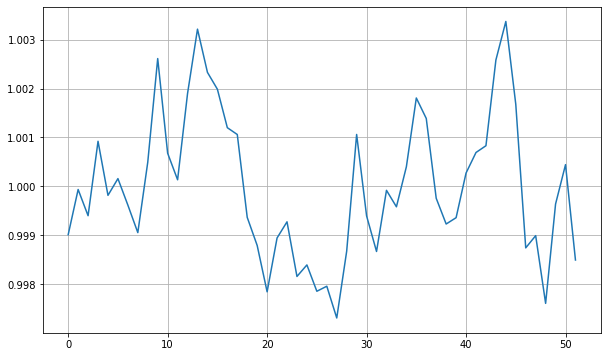

In [23]:
plt.figure(figsize = (10, 6))
plt.plot(seasonal_df['seasonal'][4:56])
plt.grid()

In [24]:
trend_array = np.array(result.trend)

1st approach consider the last value for known graph for remaining values

2nd approach is to implement moving average

In [25]:
# No. of NaNs
(np.isnan(trend_array) == True).sum() 

52

In [26]:
trend_array[:26] = trend_array[26]
trend_array[-26:] = trend_array[-27]

In [27]:
# No. of NaNs
(np.isnan(trend_array) == True).sum()

0

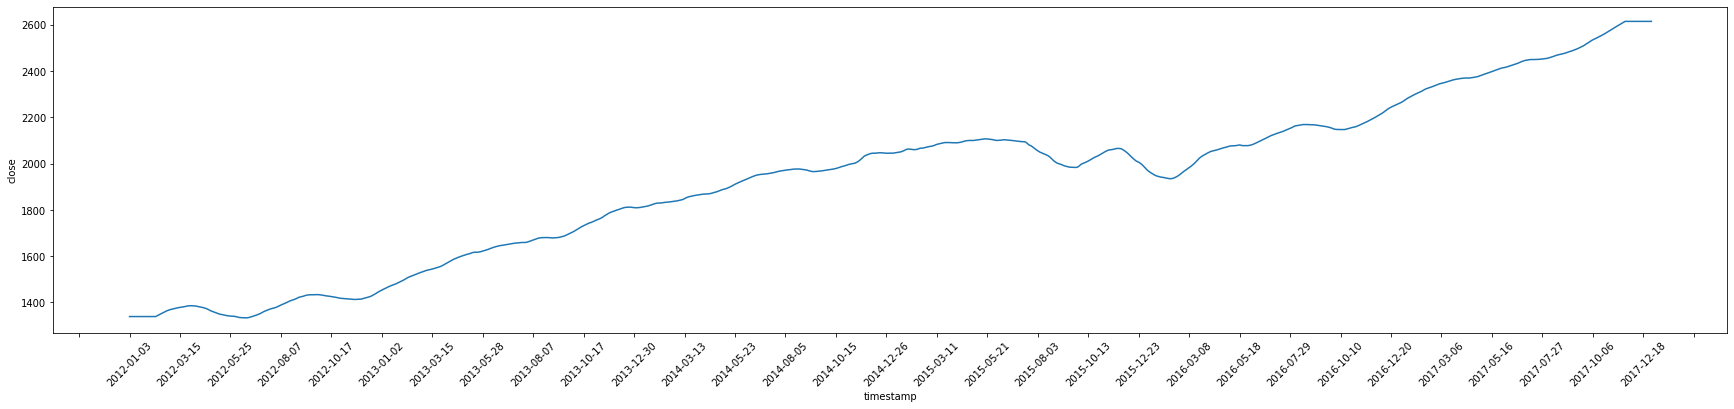

In [28]:
modi_trend_df = pd.DataFrame({'close': trend_array, 'timestamp': dataframe['timestamp']})

# Checking if the graph orientation is correct
plt.figure(figsize = (30, 6))
sns.lineplot(x = modi_trend_df['timestamp'], y = modi_trend_df['close'])
plt.xticks(rotation = 45)
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(50))
plt.show()

In [29]:
temp_close_mvng_avg = dataframe['close'][::-1].rolling(window = 10).mean()
temp_close_mvng_avg = np.array(temp_close_mvng_avg)

In [30]:
len(temp_close_mvng_avg)

1509

In [31]:
len(dataframe['timestamp'])

1509

In [32]:
timestamp_array = np.array(dataframe['timestamp'][::-1])
timestamp_array[:20]

array(['2017-12-29', '2017-12-28', '2017-12-27', '2017-12-26',
       '2017-12-22', '2017-12-21', '2017-12-20', '2017-12-19',
       '2017-12-18', '2017-12-15', '2017-12-14', '2017-12-13',
       '2017-12-12', '2017-12-11', '2017-12-08', '2017-12-07',
       '2017-12-06', '2017-12-05', '2017-12-04', '2017-12-01'],
      dtype=object)

Removing NaNs from moving average

In [33]:
temp_close_mvng_avg = temp_close_mvng_avg[9:]

In [34]:
timestamp_array = timestamp_array[9:]

In [35]:
len(timestamp_array)

1500

In [36]:
len(temp_close_mvng_avg)

1500

In [37]:
mvng_avg_df = pd.DataFrame({'Close Moving Avg': temp_close_mvng_avg, 'timestamp': timestamp_array})

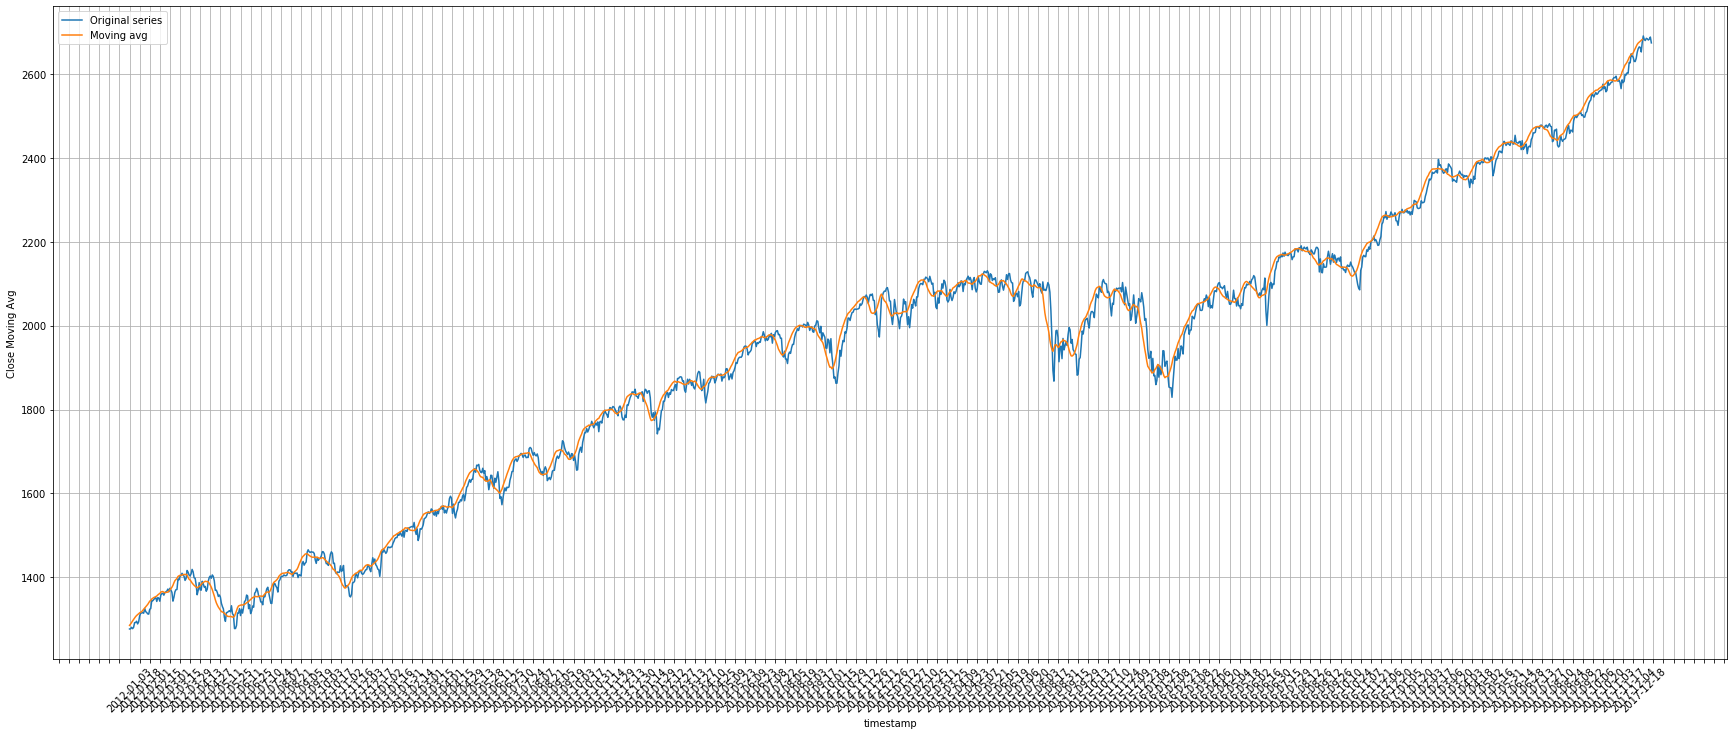

In [39]:
plt.figure(figsize = (30 , 12))
sns.lineplot(x = dataframe['timestamp'], y = dataframe['close'])
sns.lineplot(y = mvng_avg_df['Close Moving Avg'], x = mvng_avg_df['timestamp'])
plt.xticks(rotation = 45)
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.legend(['Original series', 'Moving avg'])
plt.grid()
plt.show()

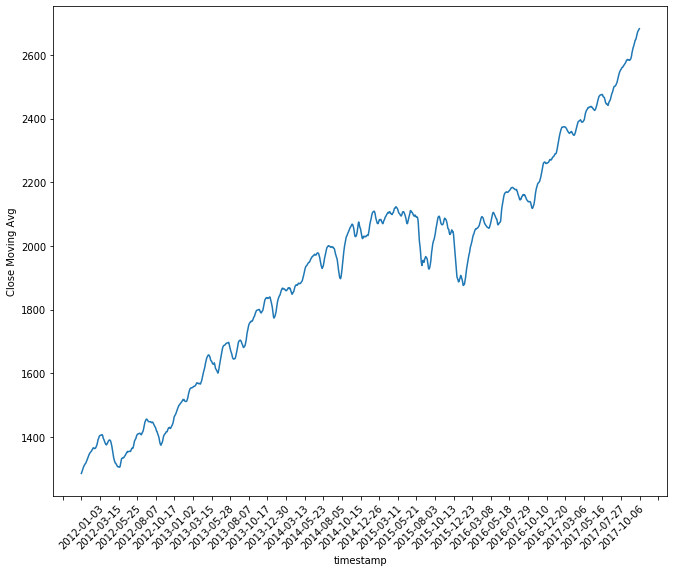

In [40]:
sns.lineplot(y = mvng_avg_df['Close Moving Avg'], x = mvng_avg_df['timestamp'])
plt.xticks(rotation = 45)
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(50))
plt.show()

Inorder to understand how the set has been oriented to feed into the network

In [41]:
mvng_avg_df

,Close Moving Avg,timestamp
0,2681.887036,2017-12-15
1,2679.727026,2017-12-14
2,2677.258032,2017-12-13
3,2675.407031,2017-12-12
4,2673.356030,2017-12-11
...,...,...
1495,1299.743994,2012-01-09
1496,1295.925000,2012-01-06
1497,1292.493005,2012-01-05
1498,1288.773010,2012-01-04


In [42]:
window_size = 10
batch_size = 16
shuffle_buffer_size = 187

In [43]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift = 1, drop_remainder = True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [44]:
train_size_factor = 0.75
data_trend = mvng_avg_df['Close Moving Avg']
data_time = mvng_avg_df['timestamp']
data_size = len(data_trend)
train_data_size = int(data_size * train_size_factor)
train_data_trend = data_trend[:train_data_size]
train_data_time = data_time[:train_data_size]
valid_data_trend = data_trend[train_data_size:]
valid_data_time = data_time[train_data_size:]

In [45]:
valid_data_time

1125    2013-07-01
1126    2013-06-28
1127    2013-06-27
1128    2013-06-26
1129    2013-06-25
           ...    
1495    2012-01-09
1496    2012-01-06
1497    2012-01-05
1498    2012-01-04
1499    2012-01-03
Name: timestamp, Length: 375, dtype: object

In [46]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

train_set = windowed_dataset(train_data_trend, window_size, batch_size, shuffle_buffer = shuffle_buffer_size)

model = tf.keras.Sequential([
   tf.keras.layers.Dense(10, input_shape=[window_size], activation = "relu"),
   tf.keras.layers.Dense(10, activation = "relu"),
   tf.keras.layers.Dense(1),
   tf.keras.layers.Lambda(lambda x: x * 0.1)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)

model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer)
history = model.fit(train_set, epochs=150, callbacks=[lr_schedule], verbose=1)

Epoch 1/150
70/70 [==============================] - 2s 34ms/step - loss: 1959.6304
Epoch 2/150
70/70 [==============================] - 0s 5ms/step - loss: 1955.1654
Epoch 3/150
70/70 [==============================] - 0s 4ms/step - loss: 1949.2216
Epoch 4/150
70/70 [==============================] - 0s 4ms/step - loss: 1943.2880
Epoch 5/150
70/70 [==============================] - 0s 4ms/step - loss: 1936.4194
Epoch 6/150
70/70 [==============================] - 0s 4ms/step - loss: 1928.4518
Epoch 7/150
70/70 [==============================] - 0s 4ms/step - loss: 1919.6793
Epoch 8/150
70/70 [==============================] - 0s 4ms/step - loss: 1908.9084
Epoch 9/150
70/70 [==============================] - 0s 4ms/step - loss: 1897.2051
Epoch 10/150
70/70 [==============================] - 0s 4ms/step - loss: 1884.0630
Epoch 11/150
70/70 [==============================] - 0s 4ms/step - loss: 1868.1212
Epoch 12/150
70/70 [==============================] - 0s 4ms/step - loss: 1850.2125


70/70 [==============================] - 0s 4ms/step - loss: 2080.4258
Epoch 100/150
70/70 [==============================] - 0s 4ms/step - loss: 2080.3850
Epoch 101/150
70/70 [==============================] - 0s 5ms/step - loss: 2080.4675
Epoch 102/150
70/70 [==============================] - 0s 4ms/step - loss: 2080.1649
Epoch 103/150
70/70 [==============================] - 0s 4ms/step - loss: 2080.1682
Epoch 104/150
70/70 [==============================] - 0s 4ms/step - loss: 2080.5483
Epoch 105/150
70/70 [==============================] - 0s 4ms/step - loss: 2080.0700
Epoch 106/150
70/70 [==============================] - 0s 4ms/step - loss: 2079.8655
Epoch 107/150
70/70 [==============================] - 0s 4ms/step - loss: 2080.2003
Epoch 108/150
70/70 [==============================] - 0s 4ms/step - loss: 2080.4244
Epoch 109/150
70/70 [==============================] - 0s 4ms/step - loss: 2080.1211
Epoch 110/150
70/70 [==============================] - 0s 4ms/step - loss: 2080

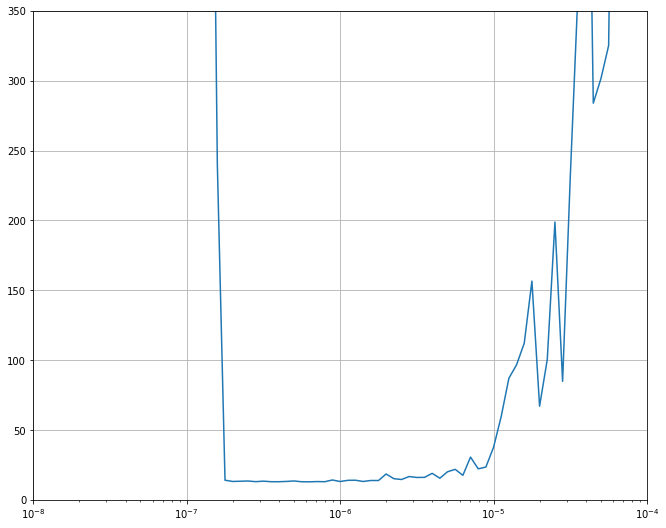

In [47]:
plt.semilogx(history.history['lr'], history.history['loss'])
plt.axis([1e-8, 1e-4, 0, 350])
plt.grid()

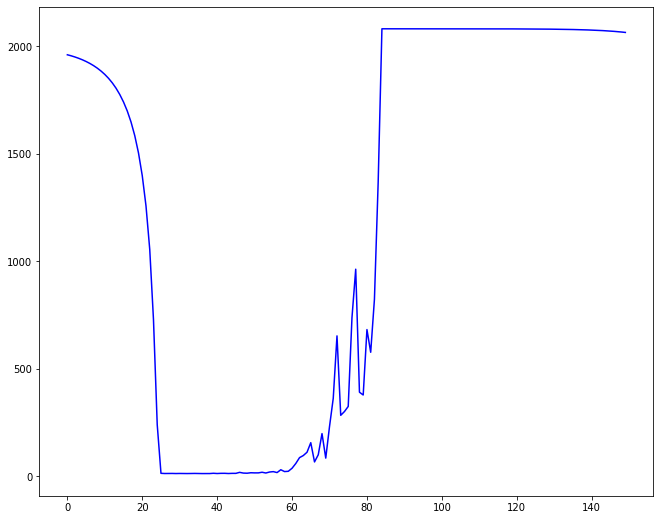

In [48]:
loss = history.history['loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.show()

In [49]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

train_set = windowed_dataset(train_data_trend, window_size, batch_size, shuffle_buffer = shuffle_buffer_size)

model = tf.keras.Sequential([
   tf.keras.layers.Dense(10, input_shape=[window_size], activation = "relu"),
   tf.keras.layers.Dense(10, activation = "relu"),
   tf.keras.layers.Dense(1),
   tf.keras.layers.Lambda(lambda x: x * 0.1)
])

optimizer = tf.keras.optimizers.SGD(lr=5.5e-6, momentum=0.9)

model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer)
history = model.fit(train_set, epochs=70, verbose=1)

Epoch 1/70
70/70 [==============================] - 1s 11ms/step - loss: 736.3064
Epoch 2/70
70/70 [==============================] - 0s 4ms/step - loss: 35.0764
Epoch 3/70
70/70 [==============================] - 0s 4ms/step - loss: 21.3368
Epoch 4/70
70/70 [==============================] - 0s 4ms/step - loss: 19.0904
Epoch 5/70
70/70 [==============================] - 0s 4ms/step - loss: 27.1128
Epoch 6/70
70/70 [==============================] - 0s 4ms/step - loss: 17.4747
Epoch 7/70
70/70 [==============================] - 0s 4ms/step - loss: 23.4785
Epoch 8/70
70/70 [==============================] - 0s 4ms/step - loss: 18.1101
Epoch 9/70
70/70 [==============================] - 0s 4ms/step - loss: 27.1928
Epoch 10/70
70/70 [==============================] - 0s 4ms/step - loss: 20.3807
Epoch 11/70
70/70 [==============================] - 0s 4ms/step - loss: 18.8466
Epoch 12/70
70/70 [==============================] - 0s 4ms/step - loss: 15.5418
Epoch 13/70
70/70 [================

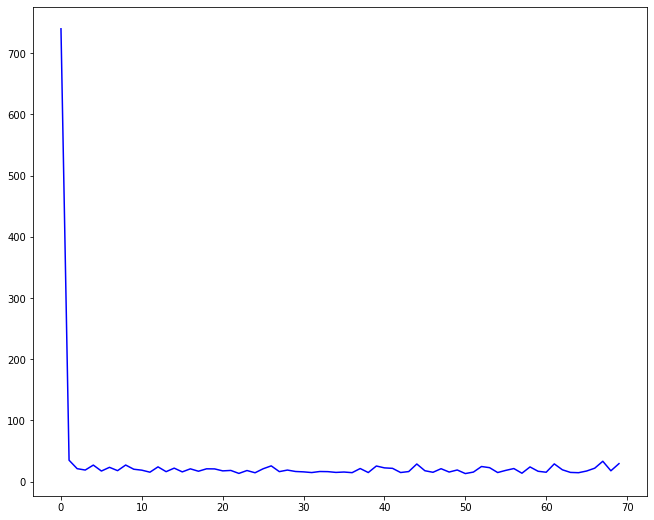

In [50]:
loss = history.history['loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.show()

In [51]:
len(temp_close_mvng_avg)

1500

In [52]:
forecast = []
count = 50
for time in range(len(temp_close_mvng_avg) - window_size):
  print(str(time) + " - " + str(time+window_size) + " -> " + str(time+window_size+1))
  if count > 51:
    count = 0
  forecast.append(model.predict(temp_close_mvng_avg[time:time + window_size][np.newaxis]) * seasonal_dict[count])
  count+=1

#print(count)
#Next forecast
#forecast.append(model.predict(temp_close_mvng_avg[207:207 + window_size][np.newaxis]))  
  
forecaster = forecast[train_data_size - window_size:]
results = np.array(forecaster)[:, 0, 0]

0 - 10 -> 11
1 - 11 -> 12
2 - 12 -> 13
3 - 13 -> 14
4 - 14 -> 15
5 - 15 -> 16
6 - 16 -> 17
7 - 17 -> 18
8 - 18 -> 19
9 - 19 -> 20
10 - 20 -> 21
11 - 21 -> 22
12 - 22 -> 23
13 - 23 -> 24
14 - 24 -> 25
15 - 25 -> 26
16 - 26 -> 27
17 - 27 -> 28
18 - 28 -> 29
19 - 29 -> 30
20 - 30 -> 31
21 - 31 -> 32
22 - 32 -> 33
23 - 33 -> 34
24 - 34 -> 35
25 - 35 -> 36
26 - 36 -> 37
27 - 37 -> 38
28 - 38 -> 39
29 - 39 -> 40
30 - 40 -> 41
31 - 41 -> 42
32 - 42 -> 43
33 - 43 -> 44
34 - 44 -> 45
35 - 45 -> 46
36 - 46 -> 47
37 - 47 -> 48
38 - 48 -> 49
39 - 49 -> 50
40 - 50 -> 51
41 - 51 -> 52
42 - 52 -> 53
43 - 53 -> 54
44 - 54 -> 55
45 - 55 -> 56
46 - 56 -> 57
47 - 57 -> 58
48 - 58 -> 59
49 - 59 -> 60
50 - 60 -> 61
51 - 61 -> 62
52 - 62 -> 63
53 - 63 -> 64
54 - 64 -> 65
55 - 65 -> 66
56 - 66 -> 67
57 - 67 -> 68
58 - 68 -> 69
59 - 69 -> 70
60 - 70 -> 71
61 - 71 -> 72
62 - 72 -> 73
63 - 73 -> 74
64 - 74 -> 75
65 - 75 -> 76
66 - 76 -> 77
67 - 77 -> 78
68 - 78 -> 79
69 - 79 -> 80
70 - 80 -> 81
71 - 81 -> 82
72

499 - 509 -> 510
500 - 510 -> 511
501 - 511 -> 512
502 - 512 -> 513
503 - 513 -> 514
504 - 514 -> 515
505 - 515 -> 516
506 - 516 -> 517
507 - 517 -> 518
508 - 518 -> 519
509 - 519 -> 520
510 - 520 -> 521
511 - 521 -> 522
512 - 522 -> 523
513 - 523 -> 524
514 - 524 -> 525
515 - 525 -> 526
516 - 526 -> 527
517 - 527 -> 528
518 - 528 -> 529
519 - 529 -> 530
520 - 530 -> 531
521 - 531 -> 532
522 - 532 -> 533
523 - 533 -> 534
524 - 534 -> 535
525 - 535 -> 536
526 - 536 -> 537
527 - 537 -> 538
528 - 538 -> 539
529 - 539 -> 540
530 - 540 -> 541
531 - 541 -> 542
532 - 542 -> 543
533 - 543 -> 544
534 - 544 -> 545
535 - 545 -> 546
536 - 546 -> 547
537 - 547 -> 548
538 - 548 -> 549
539 - 549 -> 550
540 - 550 -> 551
541 - 551 -> 552
542 - 552 -> 553
543 - 553 -> 554
544 - 554 -> 555
545 - 555 -> 556
546 - 556 -> 557
547 - 557 -> 558
548 - 558 -> 559
549 - 559 -> 560
550 - 560 -> 561
551 - 561 -> 562
552 - 562 -> 563
553 - 563 -> 564
554 - 564 -> 565
555 - 565 -> 566
556 - 566 -> 567
557 - 567 -> 5

981 - 991 -> 992
982 - 992 -> 993
983 - 993 -> 994
984 - 994 -> 995
985 - 995 -> 996
986 - 996 -> 997
987 - 997 -> 998
988 - 998 -> 999
989 - 999 -> 1000
990 - 1000 -> 1001
991 - 1001 -> 1002
992 - 1002 -> 1003
993 - 1003 -> 1004
994 - 1004 -> 1005
995 - 1005 -> 1006
996 - 1006 -> 1007
997 - 1007 -> 1008
998 - 1008 -> 1009
999 - 1009 -> 1010
1000 - 1010 -> 1011
1001 - 1011 -> 1012
1002 - 1012 -> 1013
1003 - 1013 -> 1014
1004 - 1014 -> 1015
1005 - 1015 -> 1016
1006 - 1016 -> 1017
1007 - 1017 -> 1018
1008 - 1018 -> 1019
1009 - 1019 -> 1020
1010 - 1020 -> 1021
1011 - 1021 -> 1022
1012 - 1022 -> 1023
1013 - 1023 -> 1024
1014 - 1024 -> 1025
1015 - 1025 -> 1026
1016 - 1026 -> 1027
1017 - 1027 -> 1028
1018 - 1028 -> 1029
1019 - 1029 -> 1030
1020 - 1030 -> 1031
1021 - 1031 -> 1032
1022 - 1032 -> 1033
1023 - 1033 -> 1034
1024 - 1034 -> 1035
1025 - 1035 -> 1036
1026 - 1036 -> 1037
1027 - 1037 -> 1038
1028 - 1038 -> 1039
1029 - 1039 -> 1040
1030 - 1040 -> 1041
1031 - 1041 -> 1042
1032 - 1042 -> 1

1398 - 1408 -> 1409
1399 - 1409 -> 1410
1400 - 1410 -> 1411
1401 - 1411 -> 1412
1402 - 1412 -> 1413
1403 - 1413 -> 1414
1404 - 1414 -> 1415
1405 - 1415 -> 1416
1406 - 1416 -> 1417
1407 - 1417 -> 1418
1408 - 1418 -> 1419
1409 - 1419 -> 1420
1410 - 1420 -> 1421
1411 - 1421 -> 1422
1412 - 1422 -> 1423
1413 - 1423 -> 1424
1414 - 1424 -> 1425
1415 - 1425 -> 1426
1416 - 1426 -> 1427
1417 - 1427 -> 1428
1418 - 1428 -> 1429
1419 - 1429 -> 1430
1420 - 1430 -> 1431
1421 - 1431 -> 1432
1422 - 1432 -> 1433
1423 - 1433 -> 1434
1424 - 1434 -> 1435
1425 - 1435 -> 1436
1426 - 1436 -> 1437
1427 - 1437 -> 1438
1428 - 1438 -> 1439
1429 - 1439 -> 1440
1430 - 1440 -> 1441
1431 - 1441 -> 1442
1432 - 1442 -> 1443
1433 - 1443 -> 1444
1434 - 1444 -> 1445
1435 - 1445 -> 1446
1436 - 1446 -> 1447
1437 - 1447 -> 1448
1438 - 1448 -> 1449
1439 - 1449 -> 1450
1440 - 1450 -> 1451
1441 - 1451 -> 1452
1442 - 1452 -> 1453
1443 - 1453 -> 1454
1444 - 1454 -> 1455
1445 - 1455 -> 1456
1446 - 1456 -> 1457
1447 - 1457 -> 1458


In [53]:
size = len(temp_close_mvng_avg) - window_size
#print(size)
#size is 430

In [54]:
print(temp_close_mvng_avg[size:size + window_size][np.newaxis])

[[1313.6070191 1311.2150147 1309.1320191 1306.5370117 1303.1390014
  1299.7439941 1295.925     1292.4930054 1288.7730103 1285.6750123]]


In [55]:
print(model.predict(temp_close_mvng_avg[size:size + window_size][np.newaxis]) * seasonal_dict[48])

[[1295.3248]]


In [56]:
print(model.predict(temp_close_mvng_avg[size:size + window_size][np.newaxis]) * seasonal_dict[49])

[[1297.9617]]


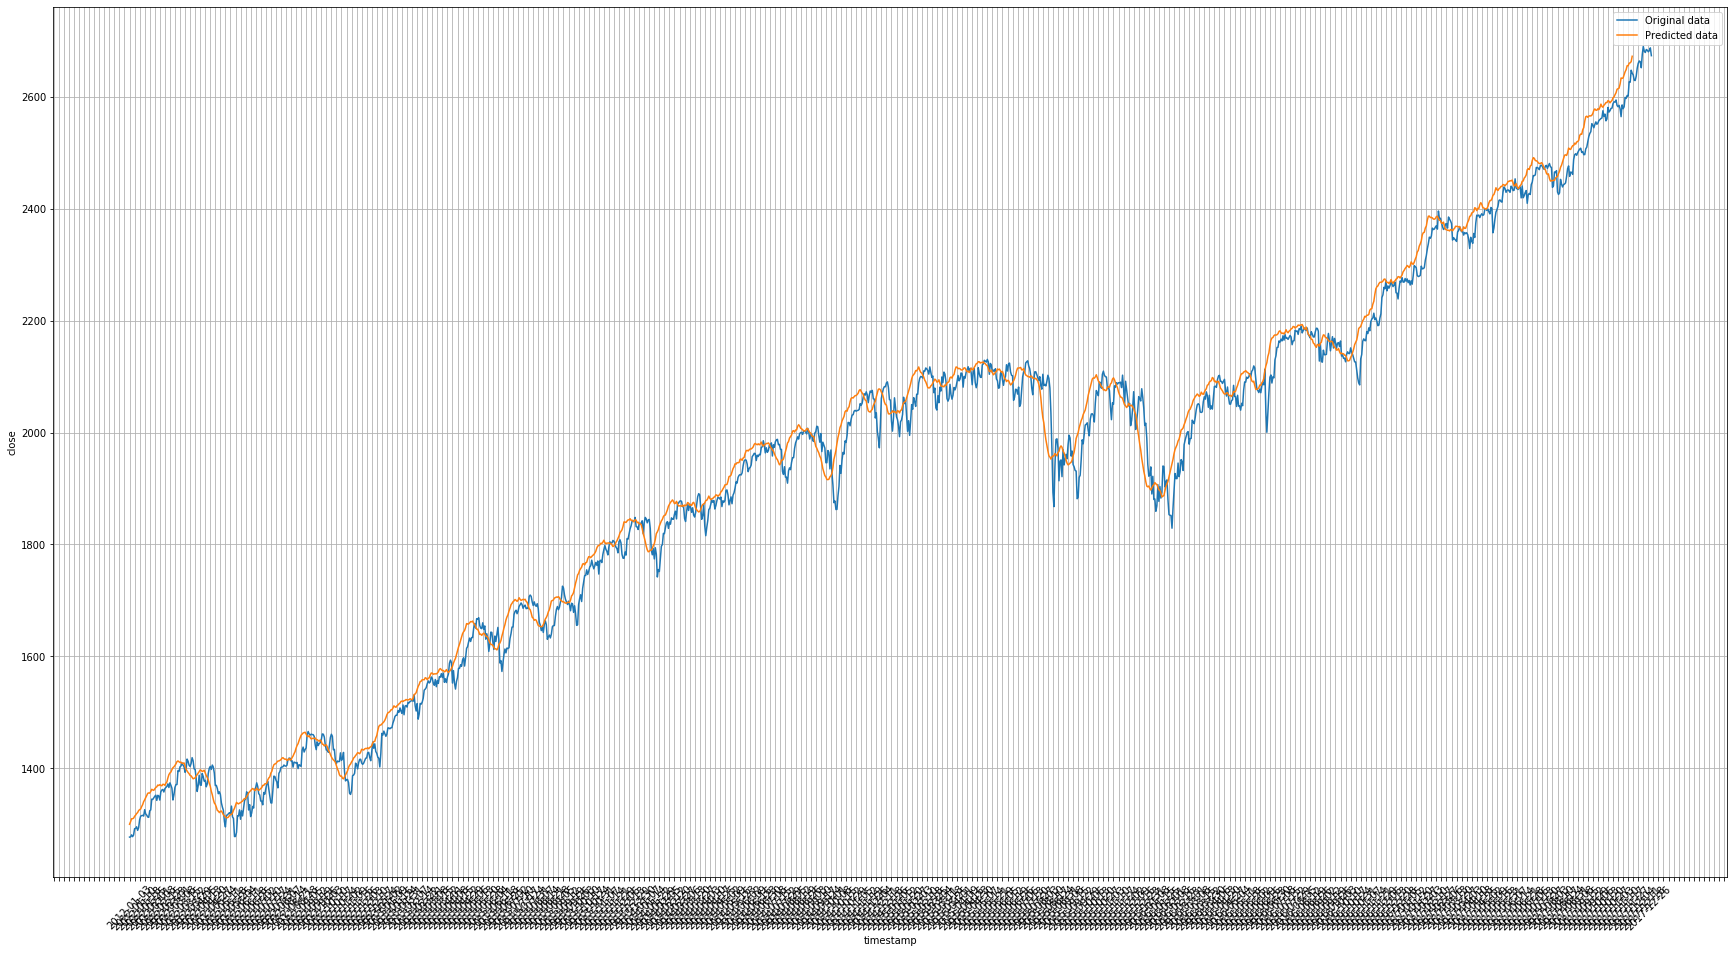

In [58]:
plt.figure(figsize = (30, 16))
sns.lineplot(x = dataframe['timestamp'], y = dataframe['close'])
sns.lineplot(x = mvng_avg_df['timestamp'][10:], y = np.array(forecast)[:, 0, 0])
#plt.plot(results)
#sns.lineplot(x = dataframe['timestamp'], y = dataframe['close'])
plt.xticks(rotation = 45)
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.legend(['Original data', 'Predicted data'])
plt.grid()
plt.show()

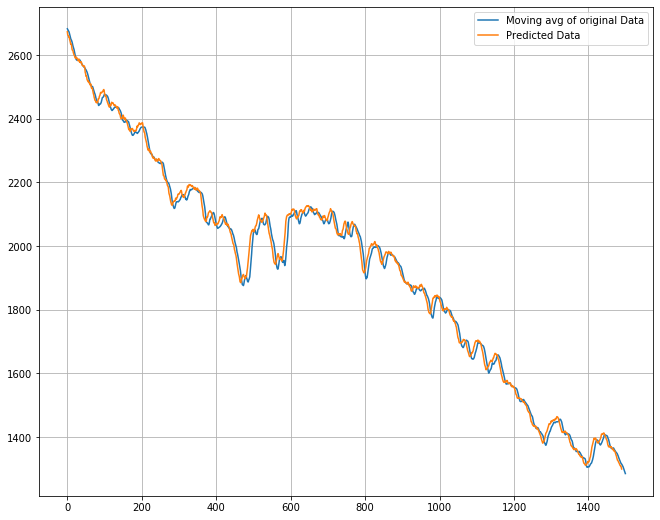

In [59]:
plt.plot(mvng_avg_df['Close Moving Avg'])
plt.plot(np.array(forecast)[:, 0, 0])
plt.legend(['Moving avg of original Data', 'Predicted Data'])
plt.grid()
plt.show()

In [60]:
len(dataframe['close'])

1509

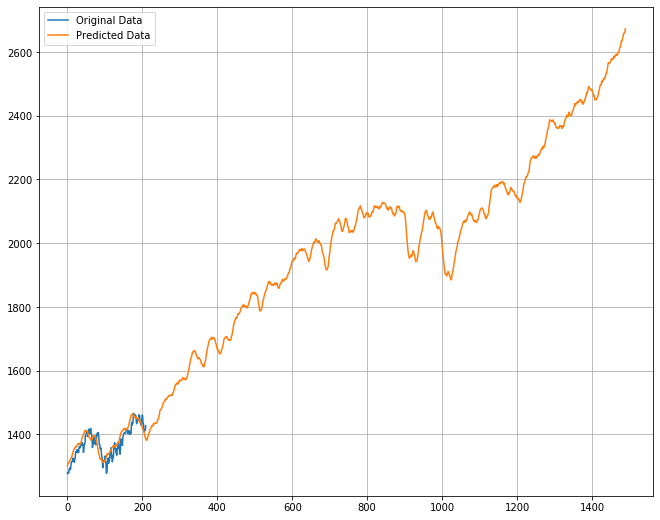

In [61]:
plt.plot(dataframe['close'][:210])
plt.plot(np.array(forecast)[:, 0, 0][::-1])
plt.legend(['Original Data', 'Predicted Data'])
plt.grid()
plt.show()

In [62]:
rev_dataframe = dataframe.iloc[::-1].reset_index(drop = True)
rev_dataframe

,close,timestamp
0,2673.610107,2017-12-29
1,2687.540039,2017-12-28
2,2682.620117,2017-12-27
3,2680.500000,2017-12-26
4,2683.340088,2017-12-22
...,...,...
1504,1280.699951,2012-01-09
1505,1277.810059,2012-01-06
1506,1281.060059,2012-01-05
1507,1277.300049,2012-01-04


In [63]:
train_size_factor = 0.75
data_trend = rev_dataframe['close']
data_time = rev_dataframe['timestamp']
data_size = len(rev_dataframe['close'])
train_data_size = int(data_size * train_size_factor)
train_data_trend = data_trend[:train_data_size]
train_data_time = data_time[:train_data_size]
valid_data_trend = data_trend[train_data_size:]
valid_data_time = data_time[train_data_size:]

In [64]:
train_data_trend = train_data_trend.values.reshape(train_data_trend.shape[0], 1)
valid_data_trend = valid_data_trend.values.reshape(valid_data_trend.shape[0], 1)

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_data_trend)
train_data_trend_rescaled = scaler.transform(train_data_trend)
valid_data_trend_rescaled = scaler.transform(valid_data_trend)

In [66]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

train_set = windowed_dataset(train_data_trend_rescaled, window_size, batch_size, shuffle_buffer = shuffle_buffer_size)

model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch/20))

optimizer = tf.keras.optimizers.SGD(lr = 1e-2, momentum = 0.9)

model.compile(loss = tf.keras.losses.Huber(),
              optimizer = optimizer,
              metrics = ['mae'])

history = model.fit(train_set, epochs = 200, callbacks = [lr_schedule])

Epoch 1/200
71/71 [==============================] - 5s 71ms/step - loss: 0.0987 - mae: 0.3958
Epoch 2/200
71/71 [==============================] - 1s 14ms/step - loss: 0.0977 - mae: 0.3945
Epoch 3/200
71/71 [==============================] - 1s 15ms/step - loss: 0.0981 - mae: 0.3949
Epoch 4/200
71/71 [==============================] - 1s 15ms/step - loss: 0.0974 - mae: 0.3934
Epoch 5/200
71/71 [==============================] - 1s 14ms/step - loss: 0.0988 - mae: 0.3960
Epoch 6/200
71/71 [==============================] - 1s 14ms/step - loss: 0.0982 - mae: 0.3950
Epoch 7/200
71/71 [==============================] - 1s 14ms/step - loss: 0.0982 - mae: 0.3943
Epoch 8/200
71/71 [==============================] - 1s 14ms/step - loss: 0.0978 - mae: 0.3943
Epoch 9/200
71/71 [==============================] - 1s 14ms/step - loss: 0.0994 - mae: 0.3958
Epoch 10/200
71/71 [==============================] - 1s 14ms/step - loss: 0.0982 - mae: 0.3950
Epoch 11/200
71/71 [=============================

71/71 [==============================] - 1s 14ms/step - loss: 0.0181 - mae: 0.1502
Epoch 86/200
71/71 [==============================] - 1s 13ms/step - loss: 0.0182 - mae: 0.1488
Epoch 87/200
71/71 [==============================] - 1s 14ms/step - loss: 0.0176 - mae: 0.1472
Epoch 88/200
71/71 [==============================] - 1s 14ms/step - loss: 0.0183 - mae: 0.1476
Epoch 89/200
71/71 [==============================] - 1s 14ms/step - loss: 0.0175 - mae: 0.1478
Epoch 90/200
71/71 [==============================] - 1s 14ms/step - loss: 0.0173 - mae: 0.1483
Epoch 91/200
71/71 [==============================] - 1s 14ms/step - loss: 0.0166 - mae: 0.1438
Epoch 92/200
71/71 [==============================] - 1s 14ms/step - loss: 0.0164 - mae: 0.1425
Epoch 93/200
71/71 [==============================] - 1s 14ms/step - loss: 0.0158 - mae: 0.1413
Epoch 94/200
71/71 [==============================] - 1s 14ms/step - loss: 0.0152 - mae: 0.1370
Epoch 95/200
71/71 [==============================] -

71/71 [==============================] - 1s 14ms/step - loss: 0.0251 - mae: 0.1706
Epoch 169/200
71/71 [==============================] - 1s 15ms/step - loss: 0.0878 - mae: 0.3265
Epoch 170/200
71/71 [==============================] - 1s 18ms/step - loss: 0.0339 - mae: 0.2167
Epoch 171/200
71/71 [==============================] - 2s 23ms/step - loss: 0.1101 - mae: 0.3482: 1s - loss: 0.23
Epoch 172/200
71/71 [==============================] - 1s 17ms/step - loss: 0.0894 - mae: 0.3306
Epoch 173/200
71/71 [==============================] - 1s 14ms/step - loss: 1.5683 - mae: 2.0712
Epoch 174/200
71/71 [==============================] - 1s 14ms/step - loss: 3.5393 - mae: 4.0339
Epoch 175/200
71/71 [==============================] - 1s 14ms/step - loss: 2.1803 - mae: 2.6390
Epoch 176/200
71/71 [==============================] - 1s 15ms/step - loss: 5.0279 - mae: 5.5231
Epoch 177/200
71/71 [==============================] - 1s 14ms/step - loss: 5.6160 - mae: 6.1020
Epoch 178/200
71/71 [======

[1e-08, 100.0, 0, 20]

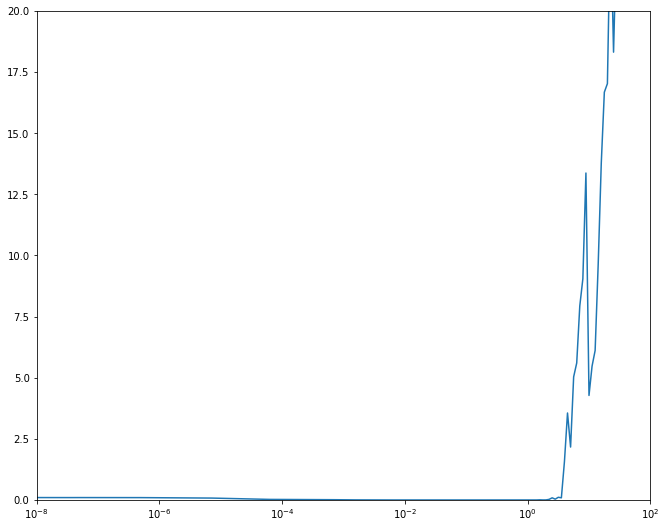

In [67]:
plt.semilogx(history.history['lr'], history.history['loss'])
plt.axis([1e-8, 1e+2, 0, 20])

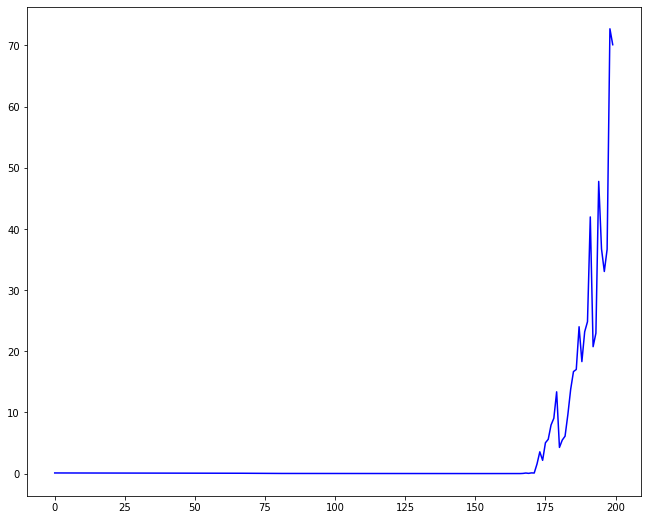

In [68]:
loss = history.history['loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.show()

In [69]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

train_set = windowed_dataset(train_data_trend_rescaled, window_size, batch_size, shuffle_buffer = shuffle_buffer_size)

model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.SGD(lr = 1e-2, momentum = 0.9)

model.compile(loss = tf.keras.losses.Huber(),
              optimizer = optimizer,
              metrics = ['mae'])

history = model.fit(train_set, epochs = 150)

Epoch 1/150
71/71 [==============================] - 5s 66ms/step - loss: 0.0312 - mae: 0.1809
Epoch 2/150
71/71 [==============================] - 1s 15ms/step - loss: 0.0173 - mae: 0.1399
Epoch 3/150
71/71 [==============================] - 1s 14ms/step - loss: 0.0118 - mae: 0.1113
Epoch 4/150
71/71 [==============================] - 1s 15ms/step - loss: 0.0071 - mae: 0.0882
Epoch 5/150
71/71 [==============================] - 1s 15ms/step - loss: 0.0044 - mae: 0.0701
Epoch 6/150
71/71 [==============================] - 1s 16ms/step - loss: 0.0025 - mae: 0.0526
Epoch 7/150
71/71 [==============================] - 1s 15ms/step - loss: 0.0019 - mae: 0.0448
Epoch 8/150
71/71 [==============================] - 1s 21ms/step - loss: 0.0014 - mae: 0.0399
Epoch 9/150
71/71 [==============================] - 1s 15ms/step - loss: 0.0013 - mae: 0.0386
Epoch 10/150
71/71 [==============================] - 1s 16ms/step - loss: 0.0012 - mae: 0.0361
Epoch 11/150
71/71 [=============================

71/71 [==============================] - 1s 15ms/step - loss: 7.3575e-04 - mae: 0.0287
Epoch 84/150
71/71 [==============================] - 1s 15ms/step - loss: 7.0027e-04 - mae: 0.0287
Epoch 85/150
71/71 [==============================] - 1s 16ms/step - loss: 6.3359e-04 - mae: 0.0271
Epoch 86/150
71/71 [==============================] - 1s 16ms/step - loss: 7.5399e-04 - mae: 0.0296
Epoch 87/150
71/71 [==============================] - 1s 15ms/step - loss: 6.9066e-04 - mae: 0.0283
Epoch 88/150
71/71 [==============================] - 1s 14ms/step - loss: 7.1893e-04 - mae: 0.0290
Epoch 89/150
71/71 [==============================] - 1s 14ms/step - loss: 6.9116e-04 - mae: 0.0276
Epoch 90/150
71/71 [==============================] - 1s 15ms/step - loss: 7.1521e-04 - mae: 0.0284
Epoch 91/150
71/71 [==============================] - 1s 15ms/step - loss: 6.9017e-04 - mae: 0.0281
Epoch 92/150
71/71 [==============================] - 1s 14ms/step - loss: 7.0314e-04 - mae: 0.0281
Epoch 93/150


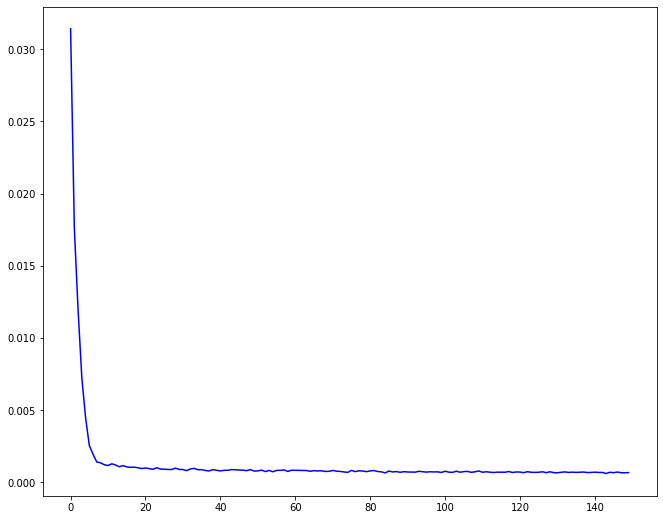

In [70]:
loss = history.history['loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.show()

In [71]:
trend_array_1 = scaler.transform(np.array(rev_dataframe['close']).reshape(rev_dataframe['close'].shape[0], 1))

In [72]:
new_forecast = []
for time in range(len(trend_array_1) - window_size):
  new_forecast.append(model.predict(trend_array_1[time:time + window_size][np.newaxis]))
  
forecaster = new_forecast[train_data_size - window_size:]
results = np.array(forecaster)[:, 0, 0]

In [73]:
len(new_forecast)

1499

In [74]:
len(mvng_avg_df['timestamp'][1:])

1499

In [75]:
new_forecast = np.array(new_forecast).reshape(len(new_forecast), 1)

In [76]:
new_forecast = scaler.inverse_transform(new_forecast)

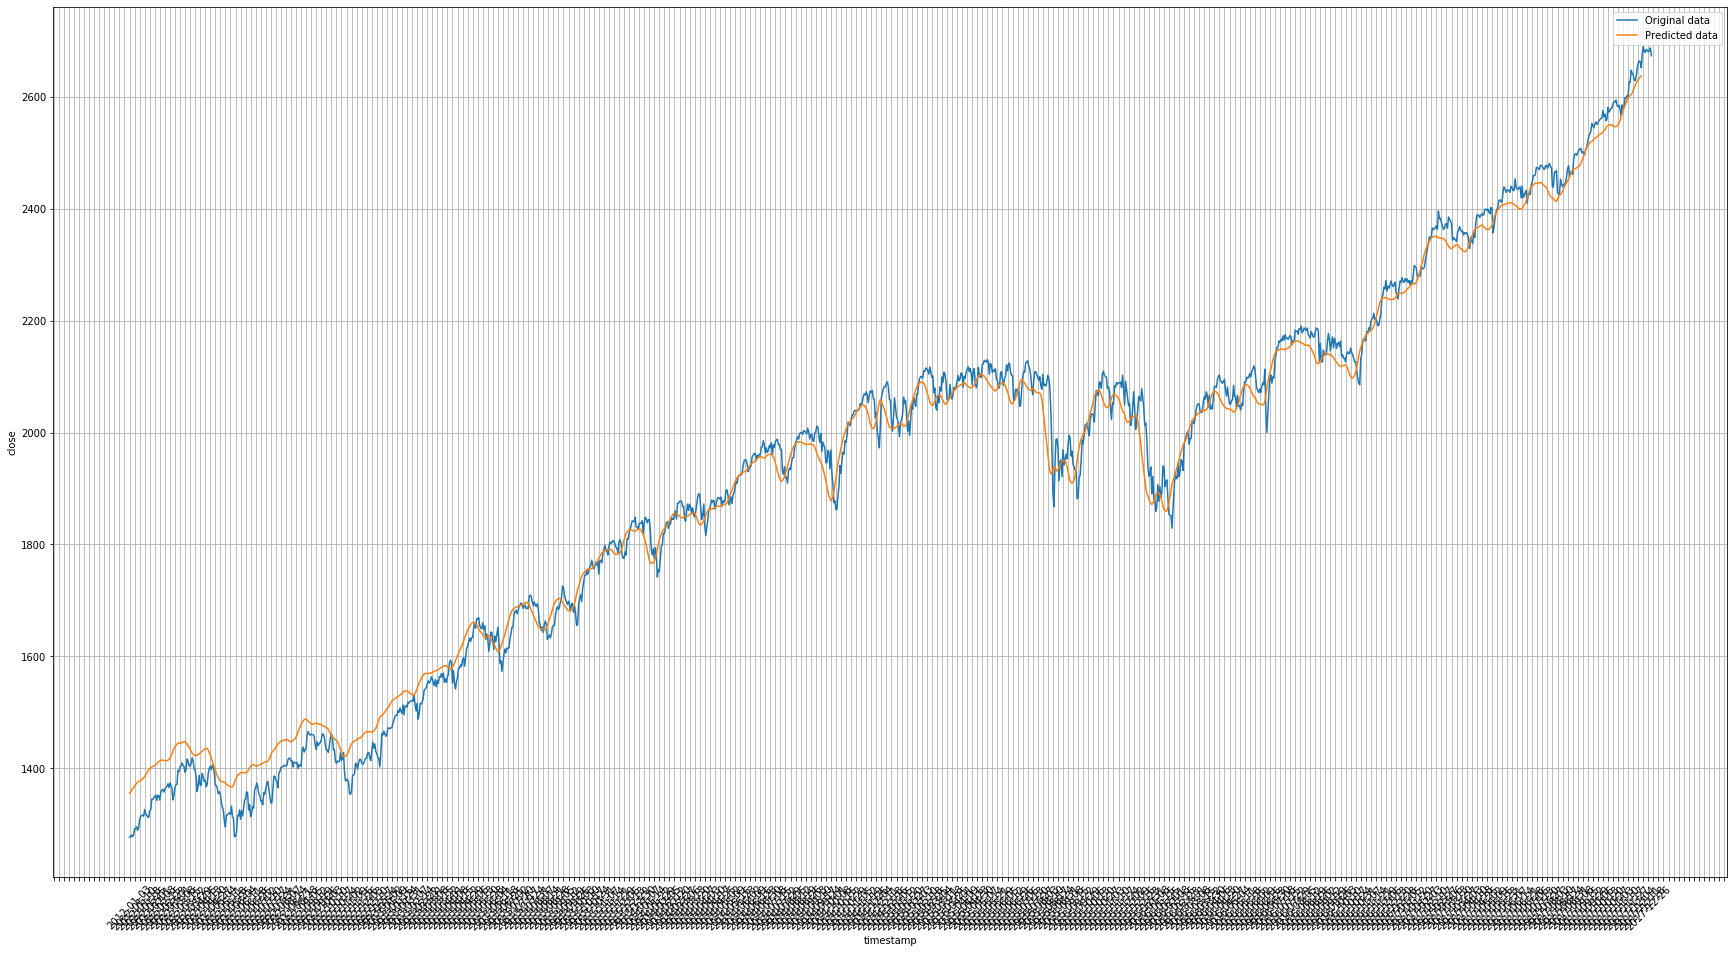

In [77]:
plt.figure(figsize = (30, 16))
sns.lineplot(x = dataframe['timestamp'], y = dataframe['close'])
sns.lineplot(x = mvng_avg_df['timestamp'][1:], y = new_forecast.reshape(new_forecast.shape[0],))
#plt.plot(results)
#sns.lineplot(x = dataframe['timestamp'], y = dataframe['close'])
plt.xticks(rotation = 45)
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.legend(['Original data', 'Predicted data'])
plt.grid()
plt.show()